<a href="https://colab.research.google.com/github/kuprel/min-dalle/blob/main/min(DALL%C2%B7E).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

In [1]:
! pip install torch flax wandb
! git clone https://github.com/kuprel/min-dalle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 197 kB 7.7 MB/s 
     |████████████████████████████████| 1.8 MB 57.2 MB/s 
     |████████████████████████████████| 217 kB 66.0 MB/s 
     |████████████████████████████████| 140 kB 48.1 MB/s 
     |████████████████████████████████| 596 kB 47.5 MB/s 
     |████████████████████████████████| 51 kB 7.4 MB/s 
     |████████████████████████████████| 145 kB 60.3 MB/s 
     |████████████████████████████████| 181 kB 18.8 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 72 kB 652 kB/s 
  Created wheel for pathtools: filename=pathtools-0.1.2-py3-none-any.whl size=8806 sha256=2febc96495d437d35565155a6e69de17a3d55cbf3f5c420d9e048d873f38dff5
  Stored in directory: /root/.cache/pip/wheels/3e/31/09/fa59cef12cdcfecc627b3d24273699f390e71828921b2cbba2
Successfully built pathtools
  Attempting uninstall: PyYAML
    Fo

### Login to Weights & Biases to download DALL·E mini model

In [2]:
import wandb
import os

os.chdir('min-dalle')
wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize


wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

### Download VQGan and DALL·E mini

In [3]:
! git lfs install
! git clone https://huggingface.co/dalle-mini/vqgan_imagenet_f16_16384 ./pretrained/vqgan
! wandb artifact get --root=./pretrained/dalle_bart_mini dalle-mini/dalle-mini/mini-1:v0

Updated git hooks.
Git LFS initialized.
Cloning into './pretrained/vqgan'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (19/19), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.
wandb: Downloading dataset artifact dalle-mini/dalle-mini/mini-1:v0
wandb: Downloading large artifact mini-1:v0, 1673.43MB. 7 files... Done. 0:0:14.2
wandb: Artifact downloaded to ./pretrained/dalle_bart_mini


### Generate an Image

parsing metadata from ./pretrained/dalle_bart_mini
tokenizing text
['Ġalien']
['Ġlife']
text tokens [0, 8925, 742, 2]
loading flax encoder
encoding text tokens
loading flax decoder
sampling image tokens
image tokens [6965, 6172, 1052, 14447, 6172, 12062, 15771, 2193, 10710, 4147, 1052, 6172, 2528, 14447, 5772, 8447, 6965, 14447, 14447, 14447, 11665, 6879, 15798, 9479, 910, 15303, 5605, 7542, 1052, 14447, 14447, 2528, 6965, 1052, 14447, 6078, 3386, 2519, 12838, 16017, 867, 8447, 11993, 12426, 11196, 14447, 14447, 2528, 6965, 14447, 14447, 7491, 16147, 13512, 8269, 271, 10397, 15945, 15945, 4903, 12892, 14447, 14447, 2528, 6965, 14447, 14447, 351, 358, 10362, 6001, 8612, 14037, 7864, 14246, 5201, 2810, 14447, 14447, 2528, 6965, 14447, 14447, 10549, 15618, 11792, 13401, 16223, 1464, 12861, 6992, 572, 601, 14447, 14447, 2528, 6965, 14447, 14447, 14447, 13183, 194, 14633, 1994, 10912, 2778, 5495, 12187, 2528, 14447, 14447, 2528, 6965, 14447, 14447, 14447, 2528, 14068, 4054, 5071, 1948, 5286

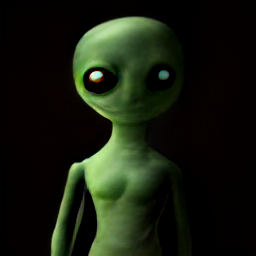

In [4]:
from min_dalle.generate_image import generate_image_from_text

image = generate_image_from_text("alien life", seed=7)
display(image)